In [1]:
# General libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Neural network libraries
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow import keras

# Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#config = tf.compat.v1.ConfigProto(device_count = {'GPU': 1})

## Preliminary work on the dataset

In [3]:
yahoo_df = pd.read_csv("../data/IBM.csv")
#yahoo_df = yahoo_df.set_index("Date")
yahoo_df = yahoo_df.set_index("Date")


X = yahoo_df[['ROC_1', 'ROC_4', 'ROC_7', 'Momentum', '1 Day ROI', '3 Day ROI',
       '5 Day ROI', '20 Day ROI', '6_day_RSI', 'MACD_12_26', 'SRSI_30',
       'Williams_1', 'Williams_3', 'Williams_14', 'ATR_14', 'CCI']]

# Train, test, val

In [4]:

X = yahoo_df[['ROC_4', 'ROC_5', 'ROC_6', '4 Day ROI', '6 Day ROI', '30 Day ROI',
       'RSI_3', 'RSI_4', 'CCI']]
y = yahoo_df["Up down"]

In [5]:
sum(y)/len(X)

0.5151515151515151

In [6]:
# Split in 80/20 the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20, shuffle=False)

# Normalize

In [7]:
def normalize(df):
    #df = data
    for column in df:
        df[column]=((df[column]-df[column].mean())/df[column].std())
    return df

In [8]:
X_train = normalize(X_train)
X_test = normalize(X_test)


# Model ANN


In [9]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'val_binary_accuracy',patience=50)

# Set the optimizer
opt = keras.optimizers.SGD(learning_rate = 0.0001)

In [10]:
metrics=[keras.metrics.Accuracy(),
    keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.49),
    keras.metrics.MeanSquaredError(name='my_mse'),
    keras.metrics.BinaryCrossentropy(),
    keras.metrics.Hinge()]

In [11]:
classifier = Sequential()
classifier.add(Dense(256,  activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(128,  activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(64,  activation = 'relu'))
classifier.add(Dense(32,  activation = 'relu'))
classifier.add(Dense(16,  activation = 'relu'))
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1,  activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = opt, loss = "binary_crossentropy", metrics = metrics)

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 50, epochs = 1000, validation_split = 0.10, callbacks = [esm],shuffle=False)

Epoch 1/1000
77/77 [==============================] - 1s 9ms/step - loss: 3.5186 - accuracy: 0.1538 - binary_accuracy: 0.4717 - my_mse: 0.4736 - binary_crossentropy: 3.5186 - hinge: 0.9965 - val_loss: 1.0085 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.5327 - val_my_mse: 0.3574 - val_binary_crossentropy: 1.0085 - val_hinge: 1.0086
Epoch 2/1000
77/77 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.0081 - binary_accuracy: 0.4717 - my_mse: 0.3850 - binary_crossentropy: 1.1977 - hinge: 0.9910 - val_loss: 0.8681 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.5327 - val_my_mse: 0.3188 - val_binary_crossentropy: 0.8681 - val_hinge: 1.0127
Epoch 3/1000
77/77 [==============================] - 0s 3ms/step - loss: 1.0282 - accuracy: 0.0031 - binary_accuracy: 0.4717 - my_mse: 0.3583 - binary_crossentropy: 1.0282 - hinge: 0.9889 - val_loss: 0.8199 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.5327 - val_my_mse: 0.3027 - val_binary_crossentropy: 0.8199 

Epoch 25/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 2.5988e-04 - binary_accuracy: 0.4977 - my_mse: 0.2550 - binary_crossentropy: 0.7035 - hinge: 0.9725 - val_loss: 0.6887 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.5421 - val_my_mse: 0.2478 - val_binary_crossentropy: 0.6887 - val_hinge: 1.0295
Epoch 26/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.0000e+00 - binary_accuracy: 0.4810 - my_mse: 0.2576 - binary_crossentropy: 0.7229 - hinge: 0.9749 - val_loss: 0.6888 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.5444 - val_my_mse: 0.2478 - val_binary_crossentropy: 0.6888 - val_hinge: 1.0297
Epoch 27/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.0000e+00 - binary_accuracy: 0.4964 - my_mse: 0.2546 - binary_crossentropy: 0.7027 - hinge: 0.9725 - val_loss: 0.6889 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.5514 - val_my_mse: 0.2479 - val_binary_crosse

Epoch 49/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.0000e+00 - binary_accuracy: 0.5177 - my_mse: 0.2519 - binary_crossentropy: 0.7011 - hinge: 0.9701 - val_loss: 0.6930 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4579 - val_my_mse: 0.2500 - val_binary_crossentropy: 0.6930 - val_hinge: 1.0319
Epoch 50/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.0000e+00 - binary_accuracy: 0.5052 - my_mse: 0.2528 - binary_crossentropy: 0.6993 - hinge: 0.9709 - val_loss: 0.6931 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4556 - val_my_mse: 0.2500 - val_binary_crossentropy: 0.6931 - val_hinge: 1.0320
Epoch 51/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.0000e+00 - binary_accuracy: 0.5047 - my_mse: 0.2534 - binary_crossentropy: 0.7044 - hinge: 0.9715 - val_loss: 0.6932 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4579 - val_my_mse: 0.2501 - val_binary_crosse

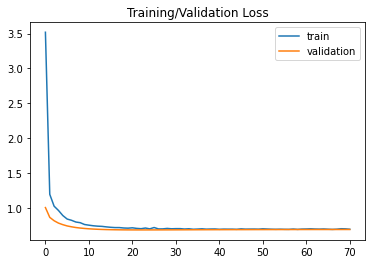

In [12]:
# Visualize the training and validation loss
plt.plot(classifier.history.history["loss"], label='train')
plt.plot(classifier.history.history['val_loss'], label='validation')
plt.legend()
#x1,y1 =plt.axis()
#plt.axis([0,0])
#plt.ylim([0.5, 0.7])
plt.title('Training/Validation Loss');
# Evaluate the model >> model.metrics_names
#print(f'{model.metrics_names}: {model.evaluate(Bitcoin_train, y_train , verbose=1)}')
plt.show()

# Save Accuracies

In [13]:
y_prob = classifier.predict(X_test)
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_prob))

In [14]:
# Computing Accuracy, Precision and Recall
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.48317757009345796


In [20]:
df_prediction = pd.read_csv("../data/model_accuracy_IBM.csv", index_col = False)
df_prediction =  df_prediction.drop(columns=["Unnamed: 0"])


In [21]:
df_prediction["ANN_pred"] = y_pred
df_prediction["ANN_accuracy"] = [accuracy for x in range(len(y_pred))]
df_prediction["ANN_prob"] = y_prob

In [22]:
df_prediction

LogReg_pred  LogReg_accuracy  LogReg_prob  LGBM_pred  LGBM_accuracy  \
0               0          0.48785     0.499232          0        0.48972   
1               1          0.48785     0.504807          1        0.48972   
2               1          0.48785     0.591117          1        0.48972   
3               1          0.48785     0.595272          1        0.48972   
4               1          0.48785     0.590655          1        0.48972   
...           ...              ...          ...        ...            ...   
1065            1          0.48785     0.543262          1        0.48972   
1066            1          0.48785     0.570132          1        0.48972   
1067            1          0.48785     0.542180          1        0.48972   
1068            1          0.48785     0.569741          1        0.48972   
1069            1          0.48785     0.543188          1        0.48972   

      LGBM_prob  y  kNN_pred  kNN_accuracy  kNN_prob  ANN_pred  ANN_accuracy  \
0      0.482038  0         0      0.508411       0.5         0      0.483178   
1      0.516175  1         0      0.508411       0.5         1      0.483178   
2      0.526401  1         0      0.508411       0.5         1      0.483178   
3      0.515859  1         1      0.508411       1.0         1      0.483178   
4      0.515859  1         1      0.508411       1.0         1      0.483178   
...         ... ..       ...           ...       ...       ...           ...   
1065   0.536454  1         0      0.508411       0.5         1      0.483178   
1066   0.521491  1         1      0.508411       1.0         1      0.483178   
1067   0.537546  0         1      0.508411       1.0         1      0.483178   
1068   0.521313  1         0      0.508411       0.5         1      0.483178   
1069   0.521491  0         1      0.508411       1.0         1      0.483178   

      ANN_prob  
0     0.490417  
1     0.506478  
2     0.594908  
3     0.625306  
4     0.620808  
...        ...  
1065  0.507600  
1066  0.546710  
1067  0.533604  
1068  0.560094  
1069  0.541299  

[1070 rows x 13 columns]

In [23]:
df_prediction.to_csv("../data/model_accuracy_IBM.csv")